In [1]:
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

In [2]:
X_data, Y_data, x_test = load_data_custom()

[[1, 3], [-2, 2], [3, 0], [3, 1]]


In [3]:
qc1 = cos_classifier(X_data[0], x_test, Y_data[0] )
r1 = exec_simulator(qc1)
r1 = retrieve_proba(r1) 
print(r1)

qc2 = cos_classifier(X_data[1], x_test, Y_data[1])
r2 = exec_simulator(qc2)
r2 = retrieve_proba(r2)
print(r2)

qc3 = cos_classifier(X_data[2], x_test, Y_data[2])
r3 = exec_simulator(qc3)
r3 = retrieve_proba(r3)
print(r3)

qc4 = cos_classifier(X_data[3], x_test, Y_data[3])
r4 = exec_simulator(qc4)
r4 = retrieve_proba(r4)
print(r4)

out = [r1, r2, r3, r4]

p0 = [p[0] for p in out]
p1 = [p[1] for p in out]
print(np.mean(p0), np.mean(p1))
r_avg = [np.mean(p0), np.mean(p1)]

[0.899, 0.10099999999999998]
[0.494, 0.506]
[0.767, 0.23299999999999998]
[0.096, 0.904]
0.5640000000000001 0.436


In [4]:
qc = ensemble_fixed_U(X_data, Y_data, x_test)
r = exec_simulator(qc, n_shots=1000)
r_ens = retrieve_proba(r)
print(r_ens)

[0.58, 0.42000000000000004]


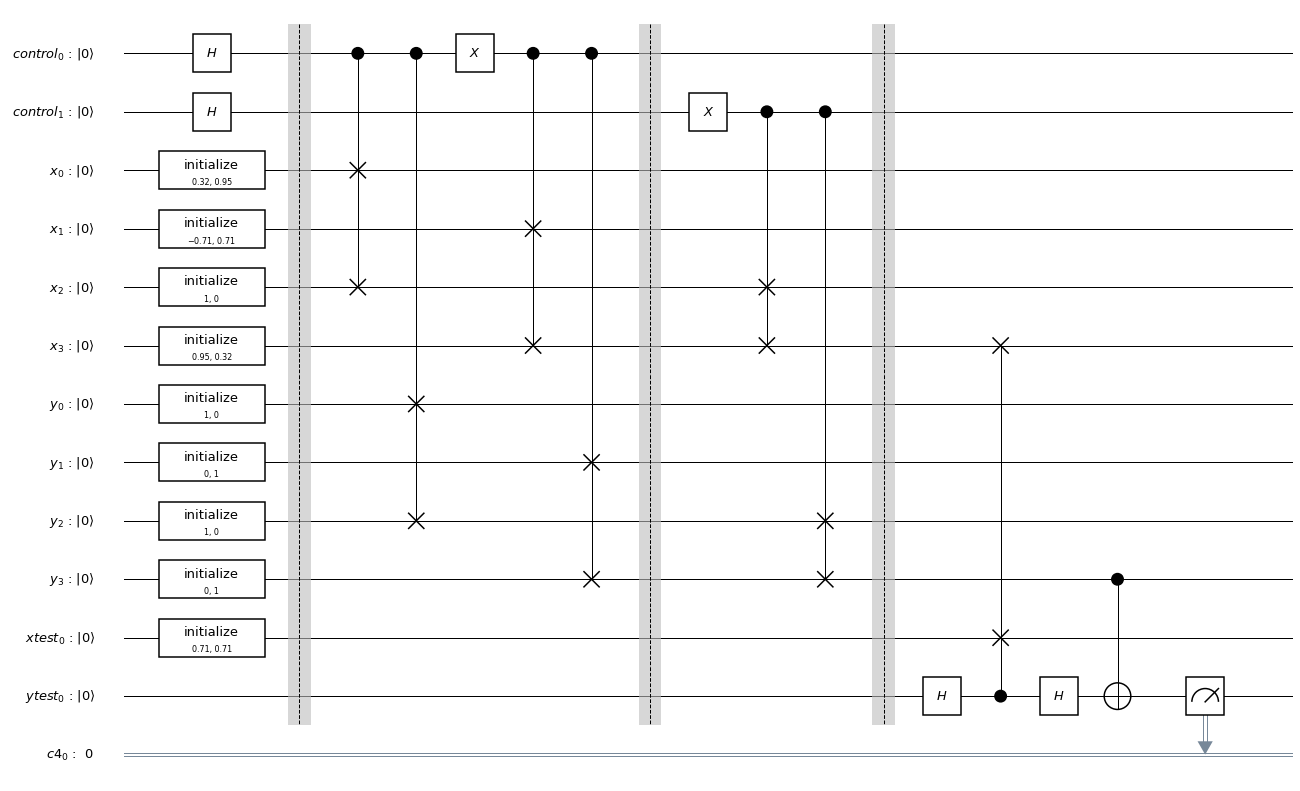

In [6]:
# Change the background color in mpl
# style = {'gatefacecolor': 'lightblue' }

qc.draw(output='mpl', scale=.9, filename='output/qiskit_qc.png')

In [7]:
out = [r1, r2, r3, r4, r_avg, r_ens]
print(out)

[[0.899, 0.10099999999999998], [0.494, 0.506], [0.767, 0.23299999999999998], [0.096, 0.904], [0.5640000000000001, 0.436], [0.58, 0.42000000000000004]]


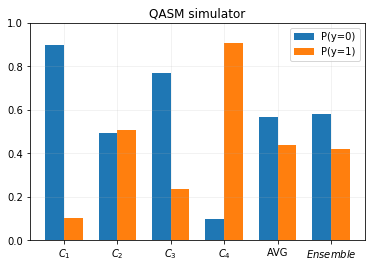

In [8]:
plot_cls(out, title= 'QASM simulator', file='SIM_ens_vs_single.png')

data_pred = pd.DataFrame(out, columns=['p0', 'p1'])
data_pred.to_csv('output/sim_results', index=False)

In [9]:
# Execution on real device
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = provider.get_backend('ibmq_rome')
# optimization_level=3

def run_real_device(qc, backend, shots=8192):
    job = execute(qc, backend, shots=shots)
    results = job.result()
    r = results.get_counts(qc)
    return r

In [10]:
qc1 = cos_classifier(X_data[0], x_test, Y_data[0])
r1 = run_real_device(qc1, backend)
r1 = retrieve_proba(r1)
print(r1)

qc2 = cos_classifier(X_data[1], x_test, Y_data[1])
r2 = run_real_device(qc2, backend)
r2 = retrieve_proba(r2)
print(r2)

qc3 = cos_classifier(X_data[2], x_test, Y_data[2])
r3 = run_real_device(qc3, backend)
r3 = retrieve_proba(r3)
print(r3)

qc4 = cos_classifier(X_data[3], x_test, Y_data[3])
r4 = run_real_device(qc4, backend)
r4 = retrieve_proba(r4)
print(r4)

out = [r1, r2, r3, r4]

p0 = [p[0] for p in out]
p1 = [p[1] for p in out]
print(np.mean(p0), np.mean(p1))
r_avg = [np.mean(p0), np.mean(p1)]

backend = provider.get_backend('ibmq_16_melbourne')

qc = ensemble_fixed_U(X_data, Y_data, x_test)
r_ens = run_real_device(qc1, backend)
r_ens = retrieve_proba(r_ens)
print(r_ens)

out = [r1, r2, r3, r4, r_avg, r_ens]
print(out)

[0.7332763671875, 0.2667236328125]
[0.4947509765625, 0.5052490234375]
[0.697998046875, 0.302001953125]
[0.350830078125, 0.649169921875]
0.5692138671875 0.4307861328125
[0.5997314453125, 0.4002685546875]
[[0.7332763671875, 0.2667236328125], [0.4947509765625, 0.5052490234375], [0.697998046875, 0.302001953125], [0.350830078125, 0.649169921875], [0.5692138671875, 0.4307861328125], [0.5997314453125, 0.4002685546875]]


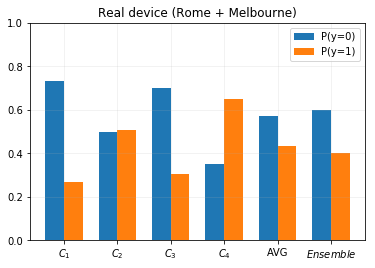

In [11]:
plot_cls(out, title='Real device (Rome + Melbourne)',
         file='RL_ens_vs_single')
data_pred = pd.DataFrame(out, columns=['p0', 'p1'])
data_pred.to_csv('output/rl_results', index=False)